# Data Wrangling & Data Cleaning (Notebook 1_Week 3 Deliverable)

In [1]:
# import the library
%matplotlib inline

import pandas as pd #pandas library, data structures and data analysis tools for python
import numpy as np #numpy library, multi-dimensional container of generic data, and scientific use
import matplotlib.pyplot as plt #matplotlib for graphs, Python 2D plotting library

# convert scientific notation to foat "decimals"
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load the data

In [2]:
df_bedbugs = pd.read_csv('declarations-exterminations-punaises-de-lit.csv')

### Summarizing your data for inspection

In [75]:
print('Bed bug extermination declarations')
print('')
print('COLUMNS')
print(df_bedbugs.columns)
print('')
print('HEAD')
print(df_bedbugs.head())
print('')
print('DESCRIBE')
print(df_bedbugs.describe())
print('')

#Ref.: https://www.geeksforgeeks.org/python-pandas-series-astype-to-convert-data-type-of-series/
print(df_bedbugs.dtypes)

Bed bug extermination declarations

COLUMNS
Index([u'NO_DECLARATION ', u'DATE_DECLARATION', u'DATE_PRIOR_INSP',
       u'EXT_FREQ', u'DATE_FIRST_EXT', u'DATE_LAST_EXT', u'HOOD_NUM',
       u'HOOD_NAME', u'BORO_NAME', u'MTM8_X', u'MTM8_Y', u'LONGITUDE',
       u'LATITUDE'],
      dtype='object')

HEAD
   NO_DECLARATION     DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ  \
0             4254 2012-10-28 16:36:04      2012-09-21      1.00   
1              830 2011-09-16 09:45:58      2011-07-13      1.00   
2             1380 2011-11-08 14:01:04      2011-11-02      1.00   
3              455 2011-08-10 09:53:47      2011-08-09      1.00   
4             1243 2011-10-26 10:11:32      2011-09-16      1.00   

  DATE_FIRST_EXT DATE_LAST_EXT HOOD_NUM      HOOD_NAME  \
0     2012-09-21    2012-09-21       24     Beaurivage   
1     2011-07-27    2011-08-17       50    Saint-Henri   
2     2011-11-07    2011-11-21       30   Sainte-Marie   
3     2011-08-09    2011-08-09       44  Upper Lachine   

### Fixing column name

In [4]:
df_bedbugs.columns = ['NO_DECLARATION ', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ','DATE_FIRST_EXT','DATE_LAST_EXT',
                      'HOOD_NUM','HOOD_NAME','BORO_NAME','MTM8_X','MTM8_Y','LONGITUDE','LATITUDE']

### Converting data types

In [5]:
#Ref [1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_bedbugs['DATE_DECLARATION'] = pd.to_datetime(df_bedbugs['DATE_DECLARATION'],
                              format='%Y/%m/%d')

#df_income['median_income'] = df_income['median_income'].str.replace(',', '').astype(float)
#df_income['mean_income'] = df_income['mean_income'].str.replace(',', '').astype(float)
#df_dec_ext.head()

### Dealing with missing values
How to deal with the missing values? Should we remove the rows or fill the gap with a value?

In [6]:
# Number of missing values by columns
print(df_bedbugs.isnull().sum())


NO_DECLARATION         0
DATE_DECLARATION       0
DATE_PRIOR_INSP        8
EXT_FREQ            2124
DATE_FIRST_EXT      2124
DATE_LAST_EXT       2124
HOOD_NUM               0
HOOD_NAME              0
BORO_NAME              0
MTM8_X                 0
MTM8_Y                 0
LONGITUDE              0
LATITUDE               0
dtype: int64


In [55]:
# select all the rows with missing values
df_bedbugs[df_bedbugs.isnull().any(axis=1)]

,NO_DECLARATION,DATE_DECLARATION,DATE_PRIOR_INSP,EXT_FREQ,DATE_FIRST_EXT,DATE_LAST_EXT,HOOD_NUM,HOOD_NAME,BORO_NAME,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
5,4331,2012-11-08 14:23:14,2012-10-10,nan,NaN,NaN,20,Marie-Victorin,Rosemont–La Petite-Patrie,298622.20,5047041.40,-73.58,45.56
25,3117,2012-07-09 15:15:03,2012-06-01,nan,NaN,NaN,70,Vieux-Lachine - Saint-Pierre,Lachine,291759.20,5033576.50,-73.67,45.44
39,2202,2012-02-19 16:52:17,2011-11-02,nan,NaN,NaN,39,Montagne,Ville-Marie,298505.60,5039407.60,-73.58,45.49
41,1896,2011-12-22 19:24:27,2011-12-22,nan,NaN,NaN,11,Parc-Extension,Villeray–Saint-Michel–Parc-Extension,294566.70,5043001.20,-73.63,45.53
45,3367,2012-07-27 12:51:16,2012-07-16,nan,NaN,NaN,26,Longue-Pointe,Mercier–Hochelaga-Maisonneuve,301819.90,5048615.20,-73.54,45.58
111,7054,2013-06-12 18:55:46,2013-04-12,nan,NaN,NaN,14,Saint-Édouard,Rosemont–La Petite-Patrie,296124.70,5043220.90,-73.61,45.53
137,7412,2013-06-26 16:01:34,2013-06-17,nan,NaN,NaN,45,Loyola,Côte-des-Neiges–Notre-Dame-de-Grâce,293551.90,5036329.00,-73.64,45.47
167,10943,2014-02-03 12:47:13,2013-11-21,nan,NaN,NaN,11,Parc-Extension,Villeray–Saint-Michel–Parc-Extension,294815.80,5042767.20,-73.63,45.52
184,10069,2013-11-28 16:47:16,2013-10-15,nan,NaN,NaN,30,Sainte-Marie,Ville-Marie,300179.30,5043509.90,-73.56,45.53
189,11591,2014-03-22 13:55:09,2014-03-12,nan,NaN,NaN,20,Marie-Victorin,Rosemont–La Petite-Patrie,298529.90,5048250.50,-73.58,45.57


### Removing outliers
Some algorithms are very sensitive to outliers. Considering the number of bedrooms, should we remove houses with an extreme number of bedrooms? How many bedrooms are too many? (Suggestion: as a rule of thumb, three standard deviations from the mean is a good measure to identify outliers).

# bedrooms
print(df_listing['bedrooms'].value_counts())
print('mean', np.mean(df_listing['bedrooms']))
print('std', np.std(df_listing['bedrooms']))
plt.hist(df_listing['bedrooms'], bins=20)
plt.show()

In [85]:
print(df_bedbugs.dtypes)

x=df_bedbugs['HOOD_NUM']
df_int_bedbugs = []
df_int_bedbugs['HOOD_NUM']=x.astype(float)

#print(df_bedbugs['BORO_NAME'])

df_bedbugs['BORO_NAME'].value_counts()

#plt.bar(df_bedbugs['BORO_NAME'].value_counts())

NO_DECLARATION               int64
DATE_DECLARATION    datetime64[ns]
DATE_PRIOR_INSP             object
EXT_FREQ                   float64
DATE_FIRST_EXT              object
DATE_LAST_EXT               object
HOOD_NUM                    object
HOOD_NAME                   object
BORO_NAME                   object
MTM8_X                     float64
MTM8_Y                     float64
LONGITUDE                  float64
LATITUDE                   float64
dtype: object


ValueError: invalid literal for float(): 60B

ValueError: x and y must have same first dimension, but have shapes (31241L, 13L) and (33365L,)

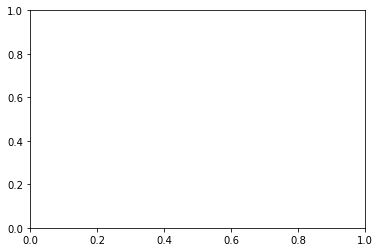

In [63]:
# Scatter plot
df_bedbugs[df_bedbugs['EXT_FREQ'].notnull()]
plt.plot(df_bedbugs[df_bedbugs['EXT_FREQ'].notnull()], df_bedbugs['HOOD_NUM'], 'o')
plt.show()

In [33]:
y_pos = np.arange(len(df_bedbugs['BORO_NAME'].value_counts()))
print(y_pos)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


https://pythonspot.com/matplotlib-bar-chart/

plt.bar(y_pos, df_bedbugs['BORO_NAME'].value_counts(), align='center', alpha=0.5)
plt.xticks(y_pos, df_bedbugs['BORO_NAME'])

plt.show()


(array([ 1.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([   18.  ,    61.02,   104.04,   147.06,   190.08,   233.1 ,
          276.12,   319.14,   362.16,   405.18,   448.2 ,   491.22,
          534.24,   577.26,   620.28,   663.3 ,   706.32,   749.34,
          792.36,   835.38,   878.4 ,   921.42,   964.44,  1007.46,
         1050.48,  1093.5 ,  1136.52,  1179.54,  1222.56,  1265.58,
         1308.6 ,  1351.62,  1394.64,  1437.66,  1480.68,  1523.7 ,
         1566.72,  1609.74

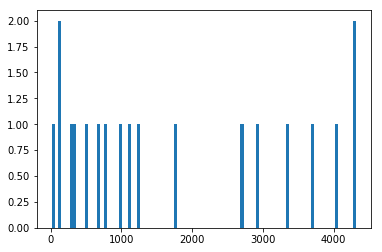

In [46]:
plt.hist(df_bedbugs['BORO_NAME'].value_counts(), bins=100)
#print(df_bedbugs['BORO_NAME'])
#plt.show()

# Dealing with outliers
houses_to_remove = []

# remove based on zipcode and price
for zipcode in df_listing['zipcode'].unique():
    df_zipcode = df_listing[df_listing['zipcode']==zipcode]
    m = np.mean(df_zipcode['price'])
    s = np.std(df_zipcode['price'])
    houses_to_remove = houses_to_remove + list(df_zipcode[df_zipcode['price']>m+3.0*s].index)
print('')
print('# houses to remove', len(houses_to_remove))

df_listing = df_listing[~df_listing.index.isin(houses_to_remove)]

### Merging Data Sets

In [14]:
df_dec_ext_base = df_dec_ext.copy()
#df_merge = df_merge.merge(df_walking_score, on='zipcode', how='left')
#df_merge = df_merge.merge(df_income, on='zipcode', how='left')

print('Total # houses', len(df_merge))

### Saving the processed file

In [16]:
df_dec_ext_base.to_csv('declarations-exterminations-punaises-de-lit-1.csv', index=False)